In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


In [102]:
import zipfile


In [103]:
zip_path= "/content/archive (9).zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall("/content/bank_data")


In [104]:
import os

In [105]:
for file in os.listdir("/content/bank_data"):
  print(file)

bank-additional-full.csv


In [106]:
df= pd.read_csv("/content/bank_data/bank-additional-full.csv", sep=';')

In [107]:
print("Dataset shape:", df.shape)

Dataset shape: (41188, 21)


In [108]:
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [109]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [110]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [111]:
print(df.tail())

       age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1        

In [112]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [113]:
df['y'] = df['y'].map({'yes': 1, 'no':0})

In [114]:
# Separate target variable 'y' after mapping
y = df['y']
x = df.drop('y', axis=1)

# Select categorical columns from the features (x)
categorical = x.select_dtypes(include=['object']).columns

# Perform one-hot encoding on the features (x)
x = pd.get_dummies(x, columns=categorical, drop_first=True)



In [115]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size= 0.2, random_state=42
)



In [116]:
clf = DecisionTreeClassifier(random_state=42, criterion='gini')
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [117]:
y_pred = clf.predict(x_test)

In [118]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8868657441126487

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238


Confusion Matrix:
 [[6817  486]
 [ 446  489]]


In [119]:
importances = pd.Series(clf.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 Features:\n", importances.head(10))


Top 10 Features:
 duration          0.350887
nr.employed       0.155049
age               0.088462
euribor3m         0.077975
campaign          0.029592
cons.conf.idx     0.025075
pdays             0.024437
housing_yes       0.014446
cons.price.idx    0.012088
previous          0.011702
dtype: float64


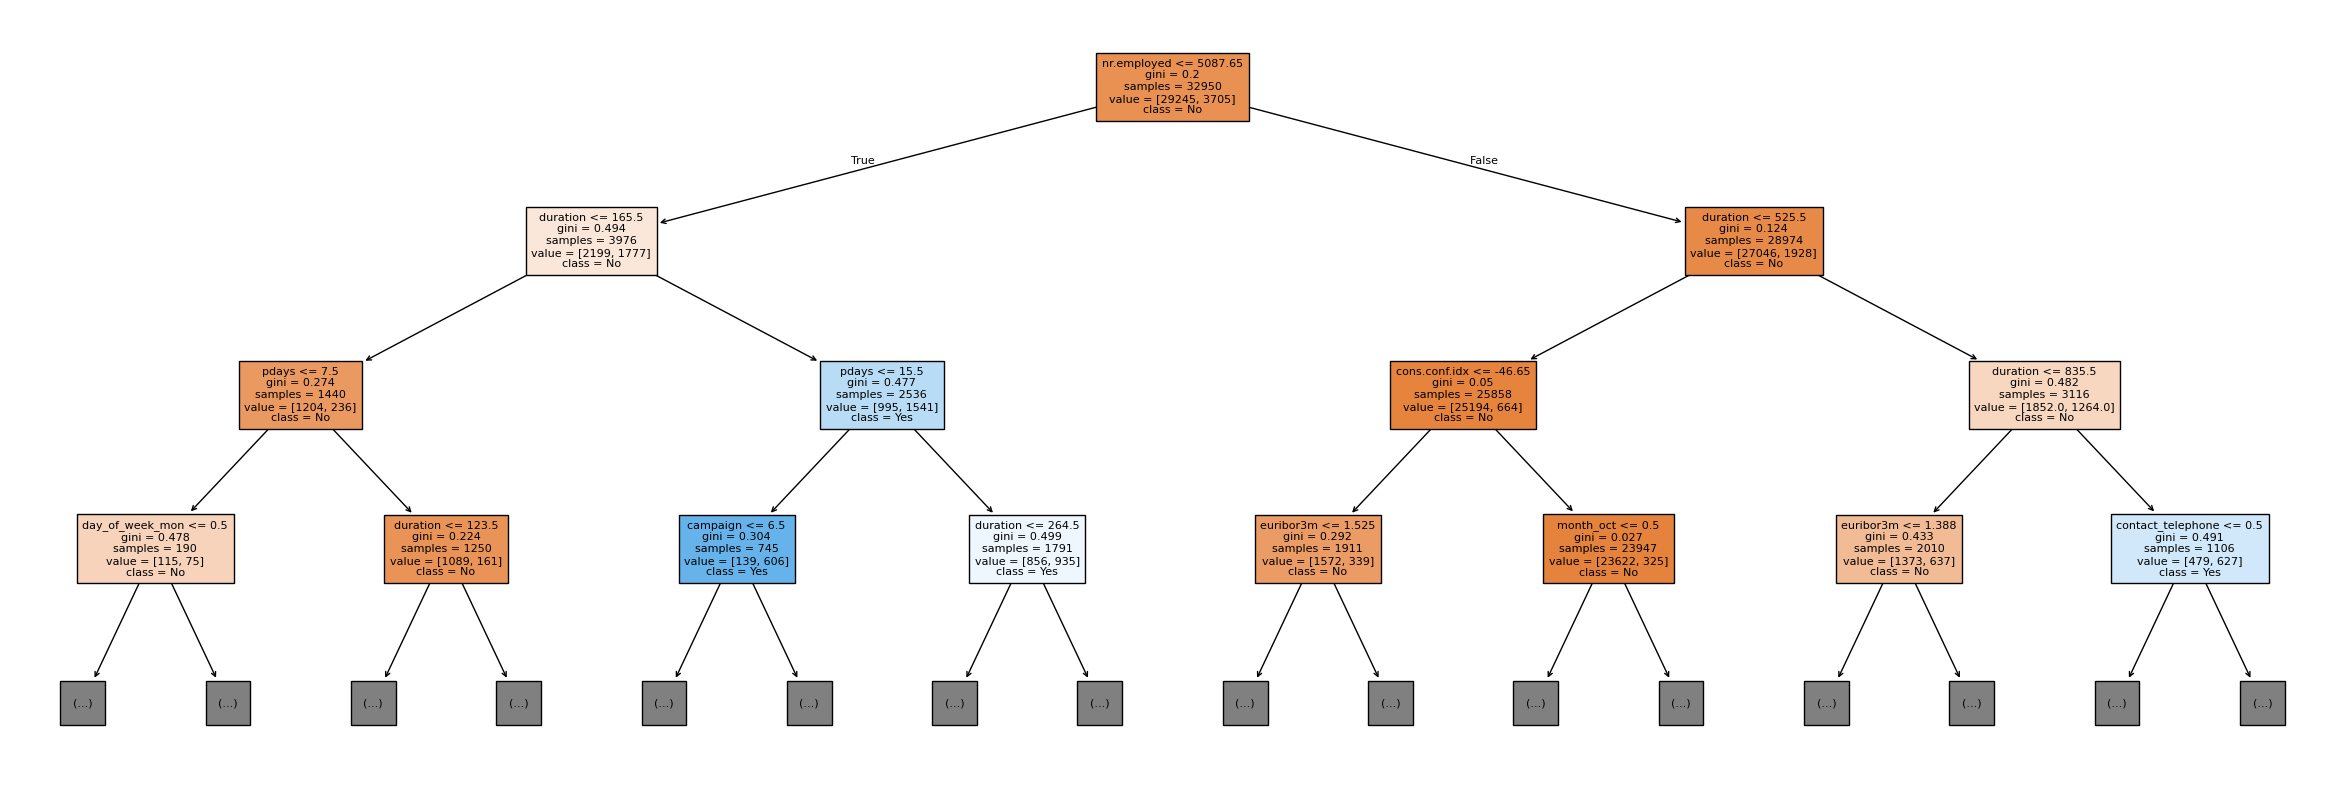

In [121]:
plt.figure(figsize=(30,10))
tree.plot_tree(
    clf,
    max_depth=3,
    feature_names=x.columns,
    class_names=['No', 'Yes'],
    filled = True,
    fontsize= 8
)
plt.show()